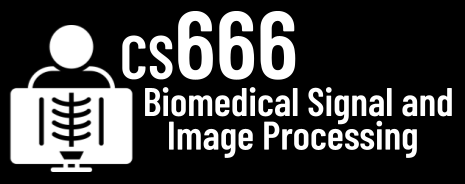
#Assignment 5

In [1]:
# NAME: Bharath Prakash Reddy Kanama

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.5 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: 220

In [9]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [10]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

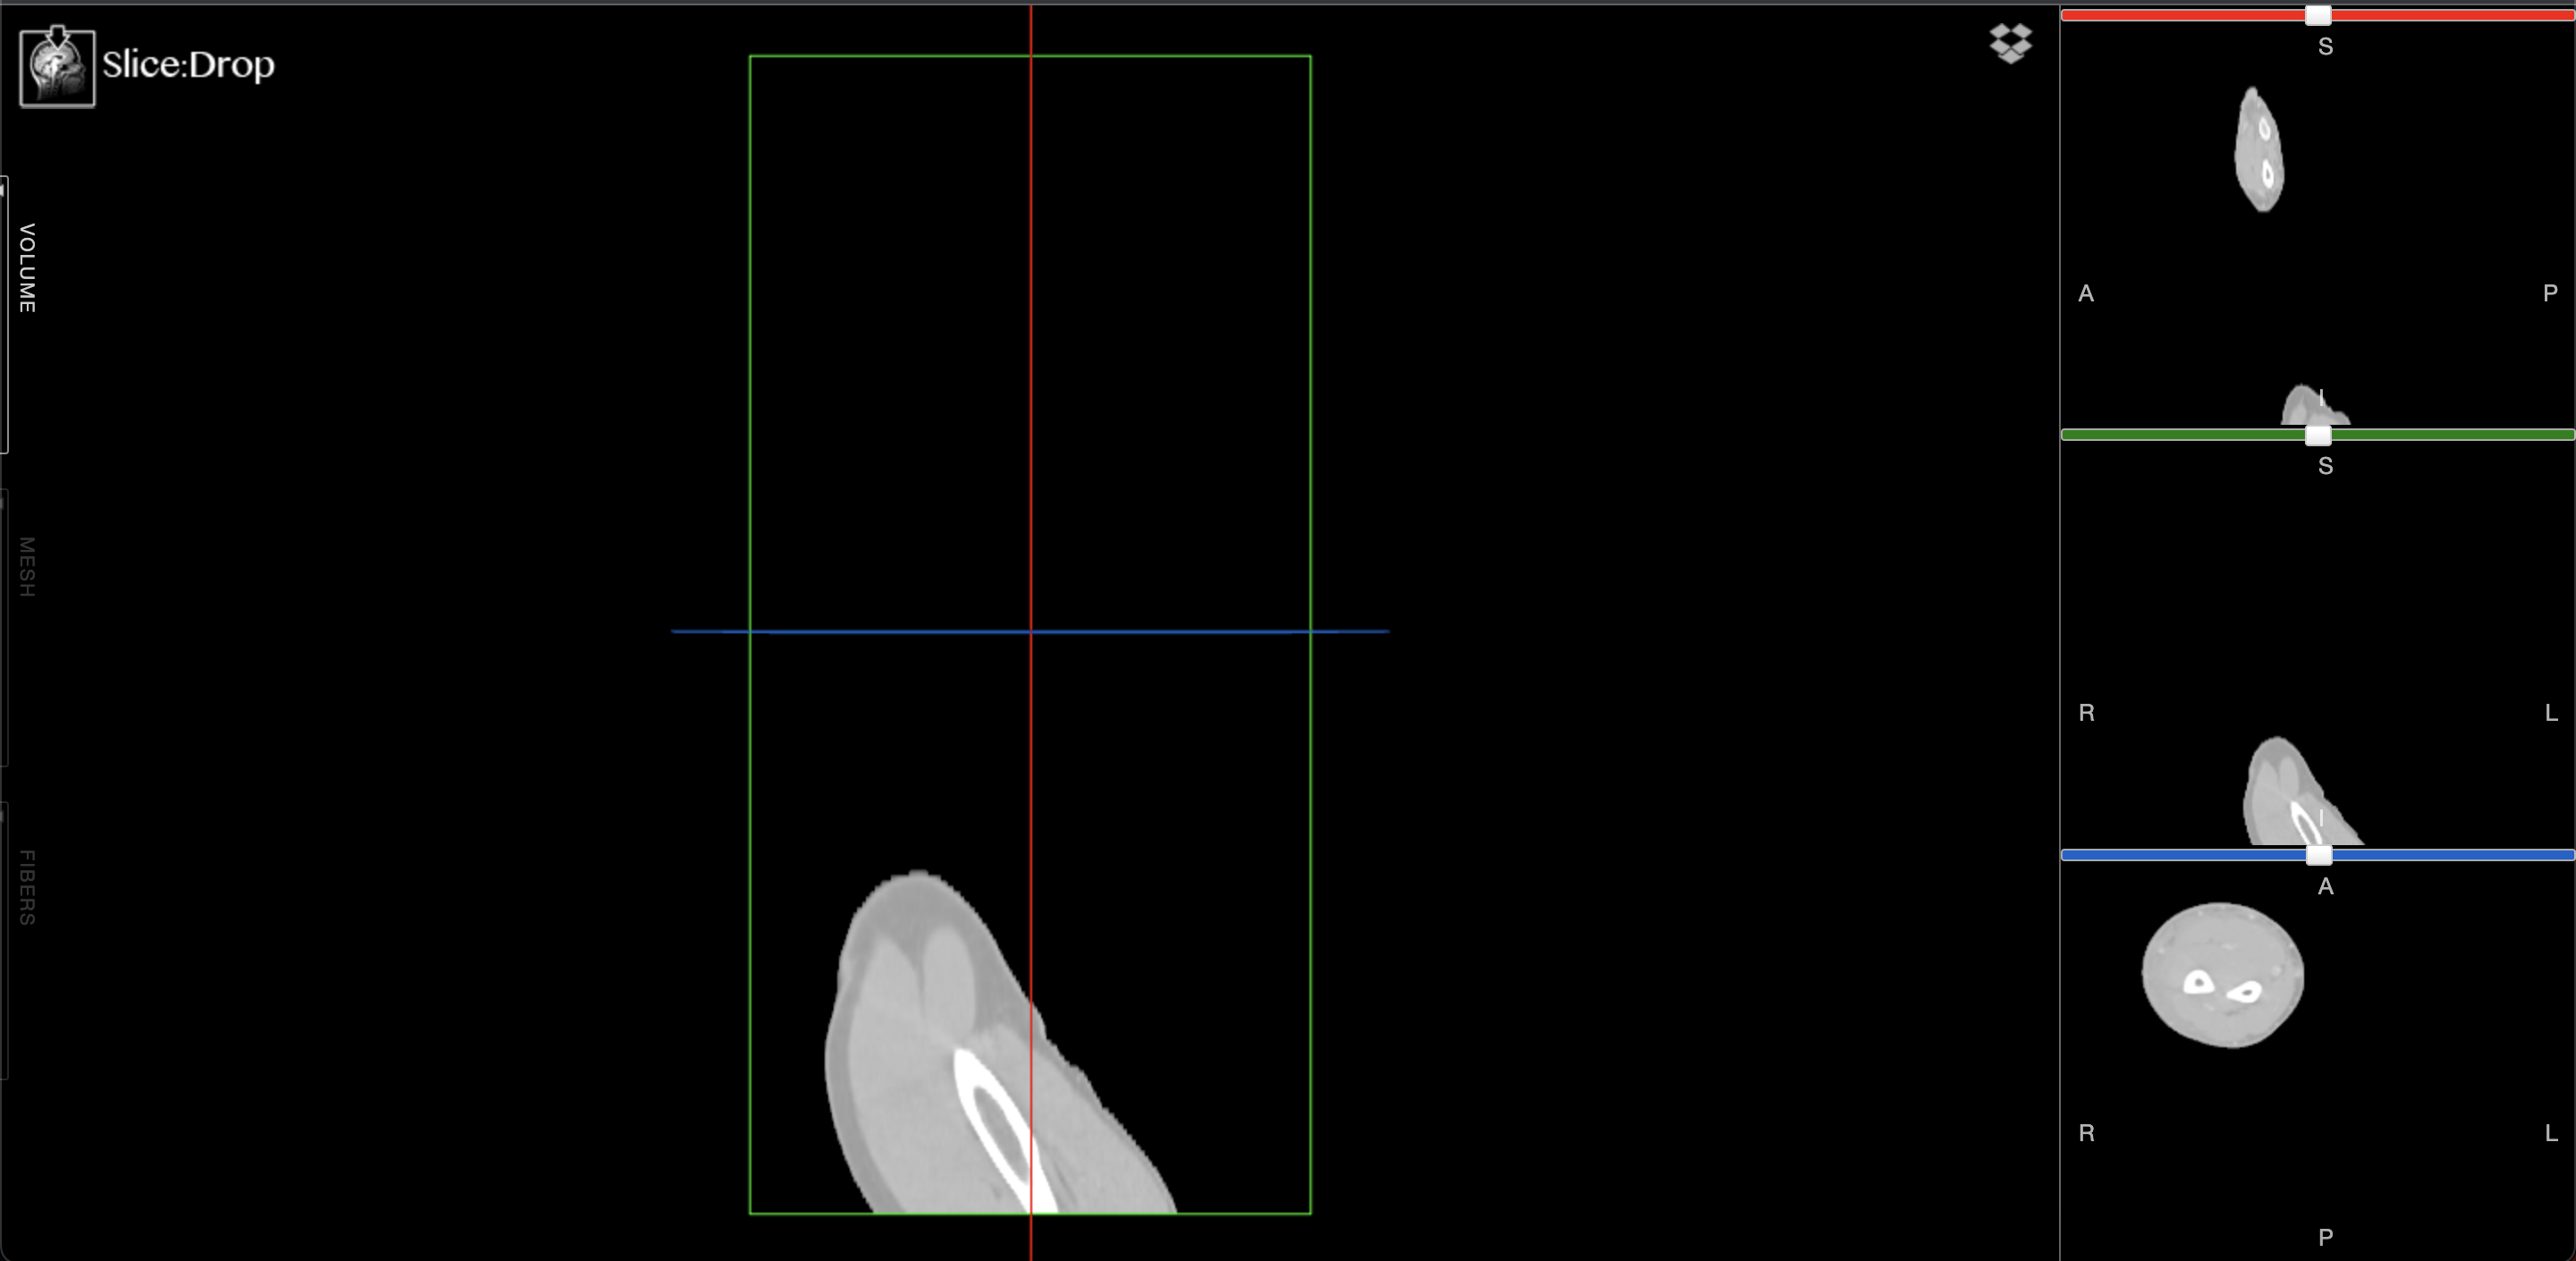

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

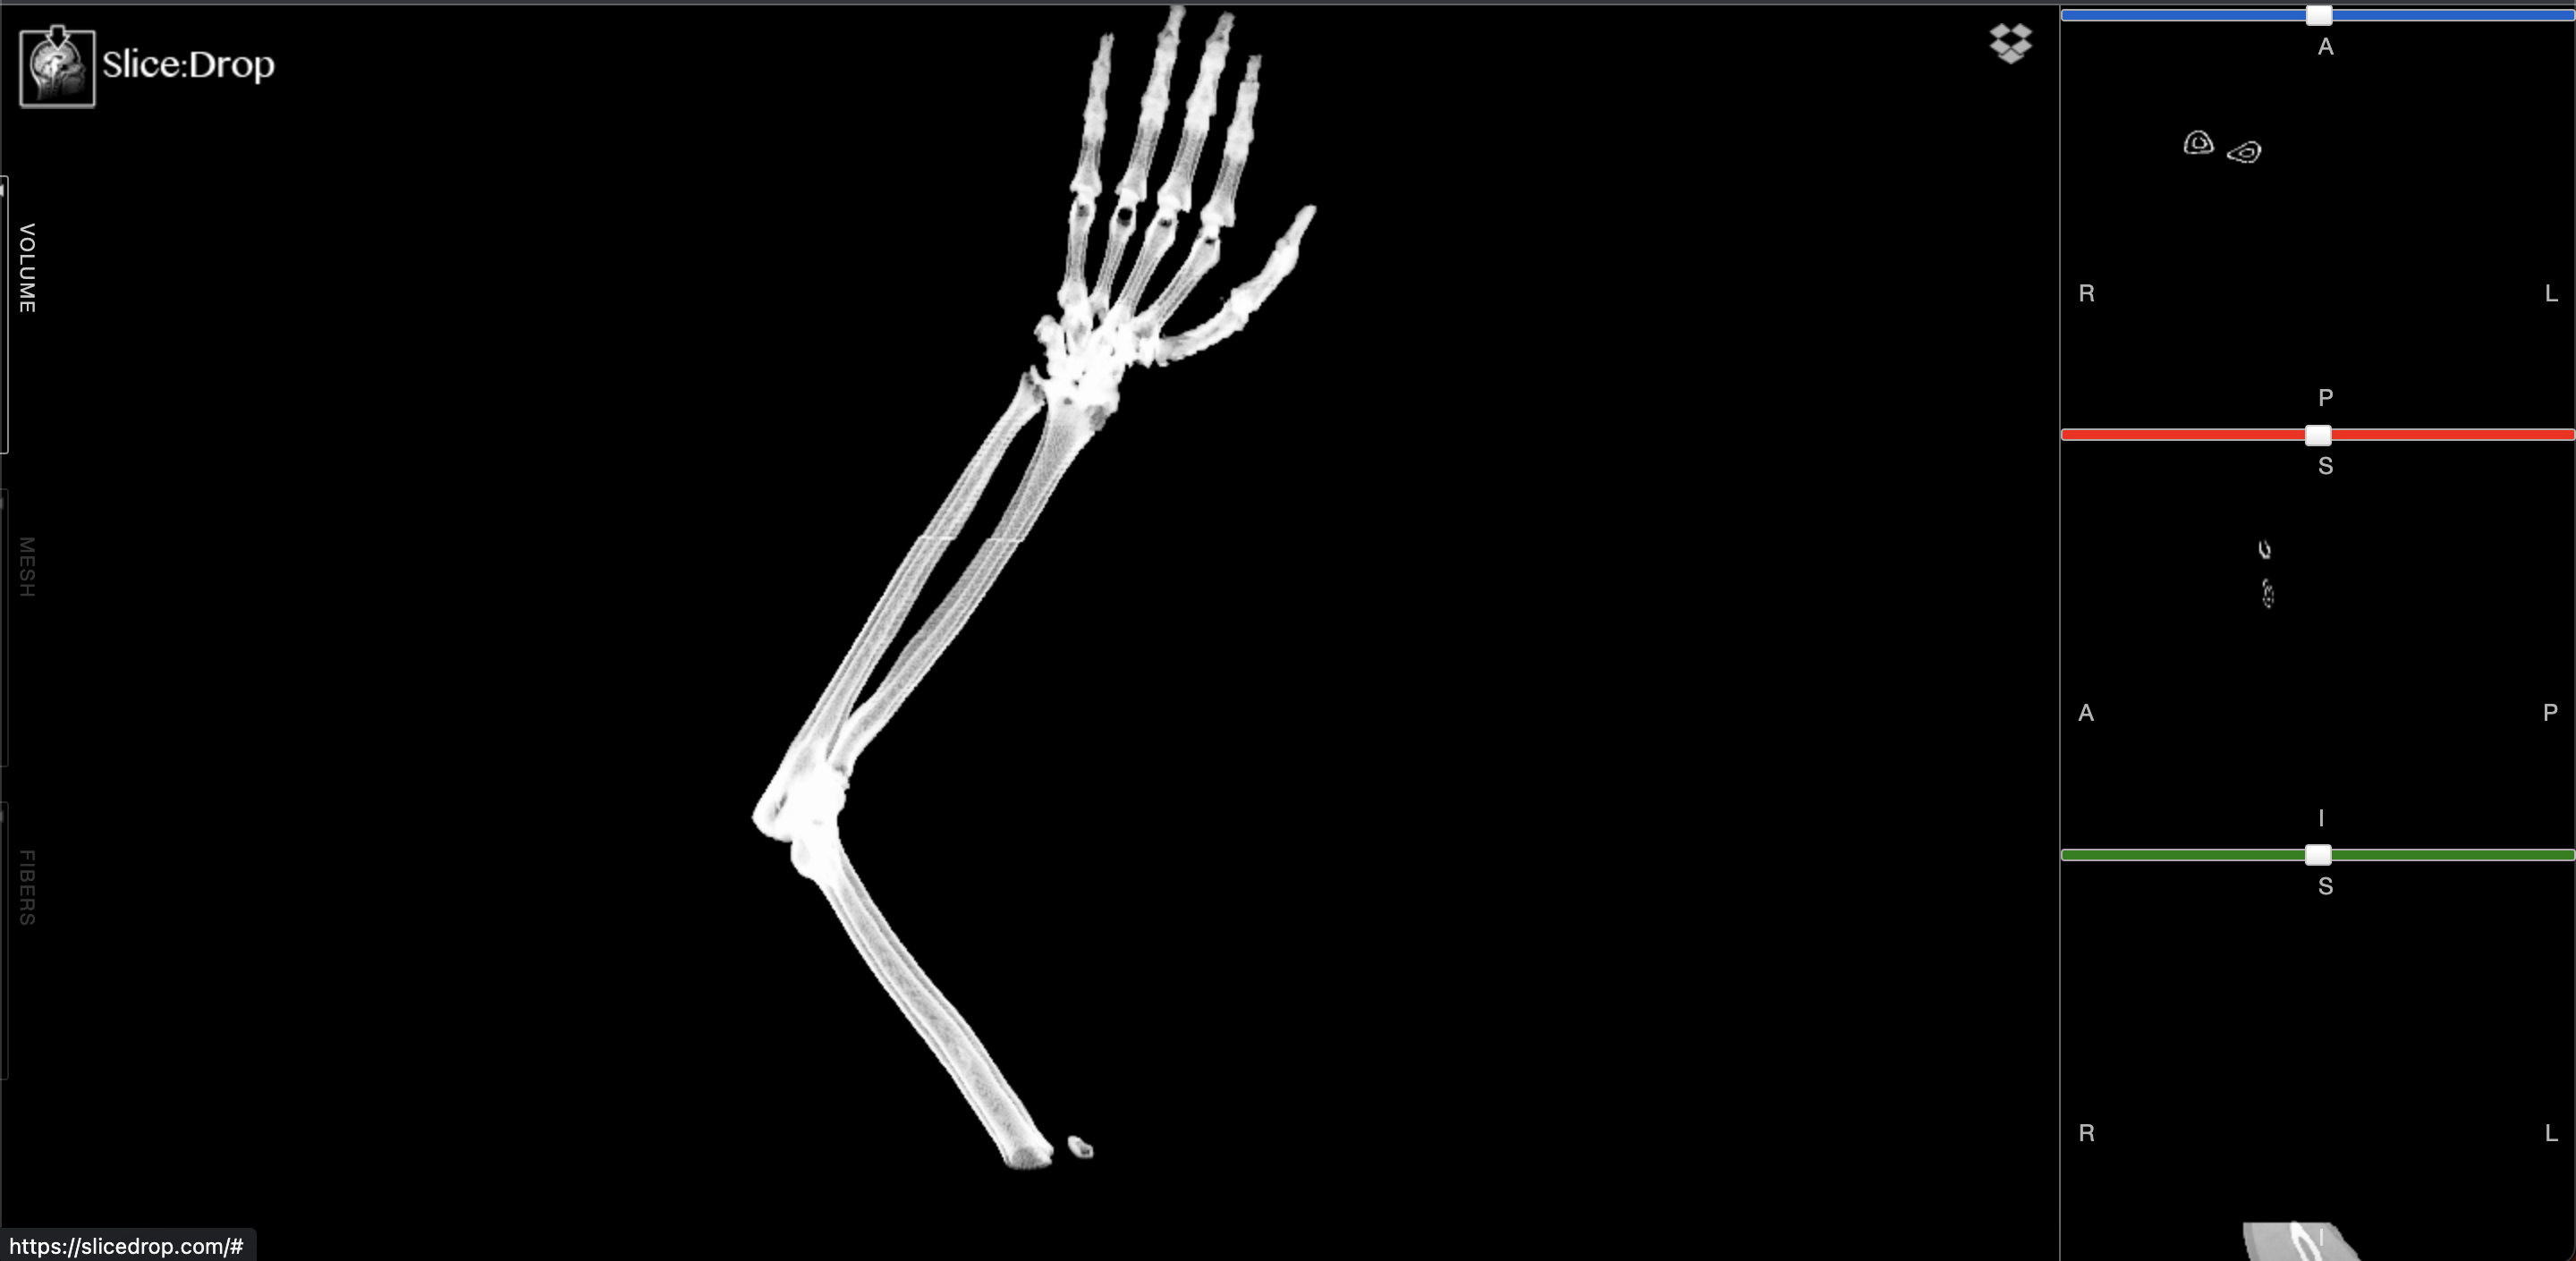

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [12]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [13]:
from pydicom import dcmread

In [14]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

import os
import numpy as np
from pydicom import dcmread

# List and sort the filenames in the extracted DICOM directory
dicom_dir = './ct'  # Change this to the path of your extracted DICOM folder
filenames = sorted(os.listdir(dicom_dir))

# Read the first file to get the dimensions of a single image slice
first_file = dcmread(os.path.join(dicom_dir, filenames[0]))
rows, cols = first_file.pixel_array.shape
num_slices = len(filenames)

# Create an empty 3D NumPy array with the dimensions of the volume
volume = np.zeros((rows, cols, num_slices), dtype=np.int16)

# Loop through all the DICOM files and store them in the 3D NumPy array
for i, filename in enumerate(filenames):
    filepath = os.path.join(dicom_dir, filename)
    dicom_slice = dcmread(filepath)
    volume[:, :, i] = dicom_slice.pixel_array

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

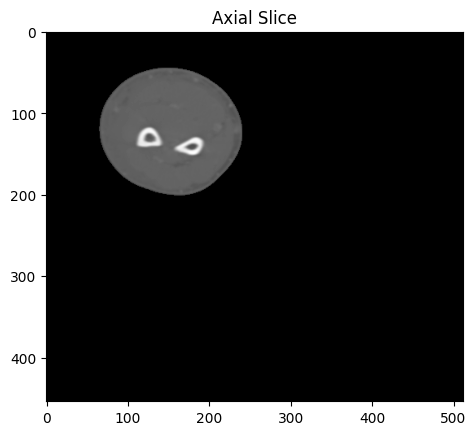

In [15]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt

# Define the slice indices for the three views
axial_index = volume.shape[2] // 2

# Create and display the axial slice
axial_slice = volume[:, :, axial_index]
plt.imshow(axial_slice, cmap='gray')
plt.title('Axial Slice')
plt.show()

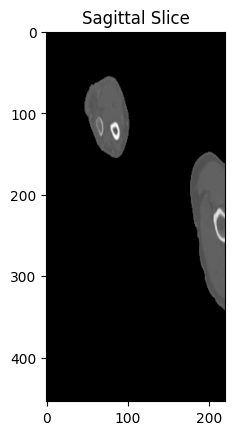

In [16]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_index = volume.shape[1] // 2

# Create and display the sagittal slice
sagittal_slice = volume[:, sagittal_index, :]
plt.imshow(sagittal_slice, cmap='gray')
plt.title('Sagittal Slice')
plt.show()

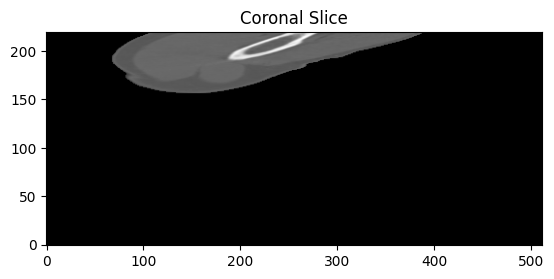

In [17]:
# TODO: YOUR CODE FOR CORONAL
coronal_index = volume.shape[0] //2

# Create and display the coronal slice
coronal_slice = volume[coronal_index, :, :]
plt.imshow(coronal_slice.T, cmap='gray', origin='lower')
plt.title('Coronal Slice')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [18]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window Center: 30
Window Width: 410
Rescale Intercept: -1024


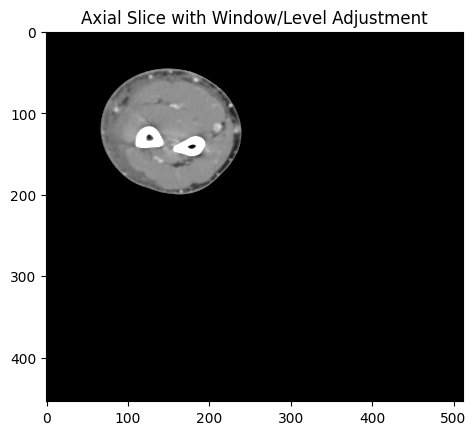

In [19]:
# TODO: YOUR CODE

# Read the Window Center, Window Width, and Rescale Intercept from the first DICOM file
window_center = first_file[0x0028, 0x1050].value
window_width = first_file[0x0028, 0x1051].value
rescale_intercept = first_file[0x0028, 0x1052].value

# Print the Window Center, Window Width, and Rescale Intercept
print("Window Center:", window_center)
print("Window Width:", window_width)
print("Rescale Intercept:", rescale_intercept)

# Apply the Rescale Intercept to the slice data
hu_pixels = axial_slice + rescale_intercept

# Calculate vmin and vmax for window/level adjustment
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Visualize the slice with window/level adjustment
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
plt.title('Axial Slice with Window/Level Adjustment')
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

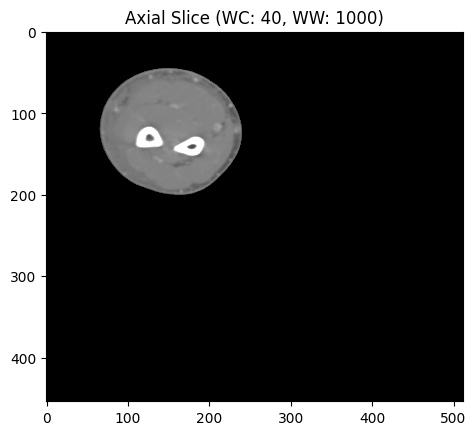

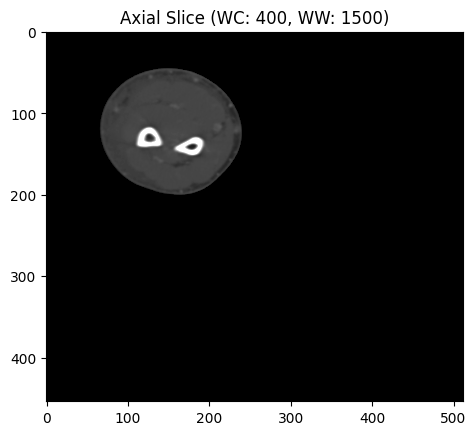

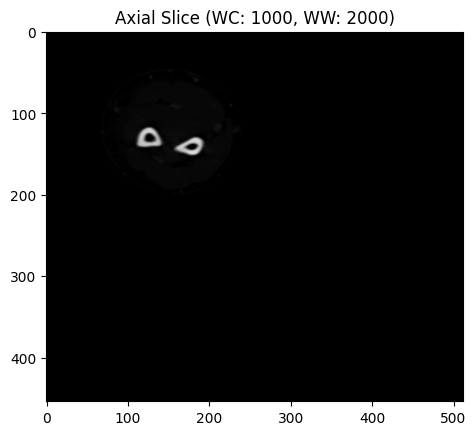

In [20]:
# TODO: YOUR CODE

# Function to visualize the slice with given Window/Level values
def visualize_slice_with_window_level(slice_data, window_center, window_width):
    hu_pixels = slice_data + rescale_intercept
    vmin = window_center - window_width / 2
    vmax = window_center + window_width / 2
    plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
    plt.title(f'Axial Slice (WC: {window_center}, WW: {window_width})')
    plt.show()

# Play around with different Window/Level values
window_center_1 = 40
window_width_1 = 1000
visualize_slice_with_window_level(axial_slice, window_center_1, window_width_1)

window_center_2 = 400
window_width_2 = 1500
visualize_slice_with_window_level(axial_slice, window_center_2, window_width_2)

window_center_3 = 1000
window_width_3 = 2000
visualize_slice_with_window_level(axial_slice, window_center_3, window_width_3)

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

For this particular CT scan of an arm, some appropriate Window Center and Window Width values could be:

<strong>Center: 400, Width: 1500.</strong>

These values allow us to visualize the bone structures with good contrast and detail, while also showing the surrounding soft tissues. However, the optimal values may vary depending on the preferences of the viewer or the specific diagnostic task at hand.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [21]:
def create_mask(volume, lower_threshold, upper_threshold):
    mask = volume.copy().astype(np.int16)
    mask[mask < lower_threshold] = 0
    mask[mask > upper_threshold] = 0
    mask[np.logical_and(mask >= lower_threshold, mask <= upper_threshold)] = 1
    return mask

def display_slices(volume, title):
    axial = volume[:, :, axial_index]
    sagittal = volume[:, sagittal_index, :]
    coronal = volume[coronal_index, :, :]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(axial, cmap='gray')
    axes[0].set_title('Axial')
    axes[1].imshow(sagittal, cmap='gray')
    axes[1].set_title('Sagittal')
    axes[2].imshow(coronal.T, cmap='gray', origin='lower')
    axes[2].set_title('Coronal')
    fig.suptitle(title)
    plt.show()

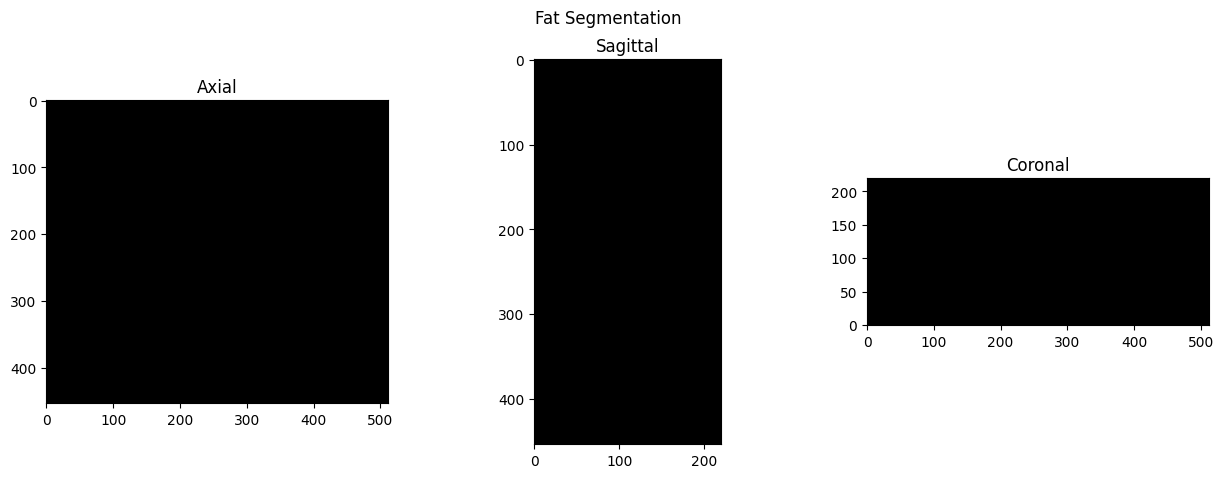

In [22]:
# TODO: YOUR CODE TO SEGMENT FAT

# Segment fat
fat_lower_threshold, fat_upper_threshold = -150, -50
fat_mask = create_mask(volume, fat_lower_threshold, fat_upper_threshold)
display_slices(fat_mask, 'Fat Segmentation')

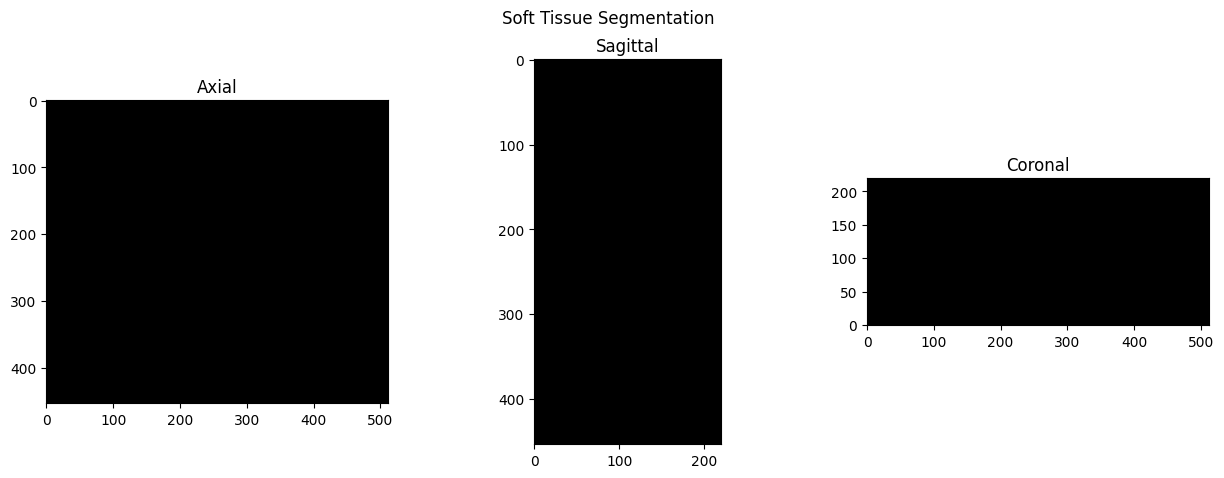

In [23]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

# Segment soft tissue
soft_tissue_lower_threshold, soft_tissue_upper_threshold = -50, 150
soft_tissue_mask = create_mask(volume, soft_tissue_lower_threshold, soft_tissue_upper_threshold)
display_slices(soft_tissue_mask, 'Soft Tissue Segmentation')

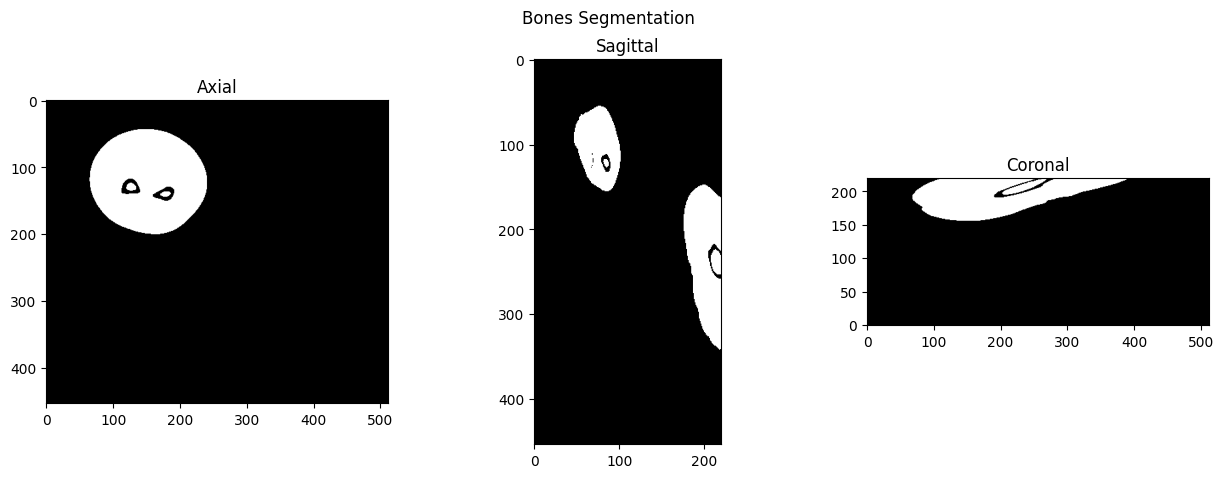

In [24]:
# TODO: YOUR CODE TO SEGMENT BONES

# Segment bones
bones_lower_threshold, bones_upper_threshold = 150, 2000
bones_mask = create_mask(volume, bones_lower_threshold, bones_upper_threshold)
display_slices(bones_mask, 'Bones Segmentation')

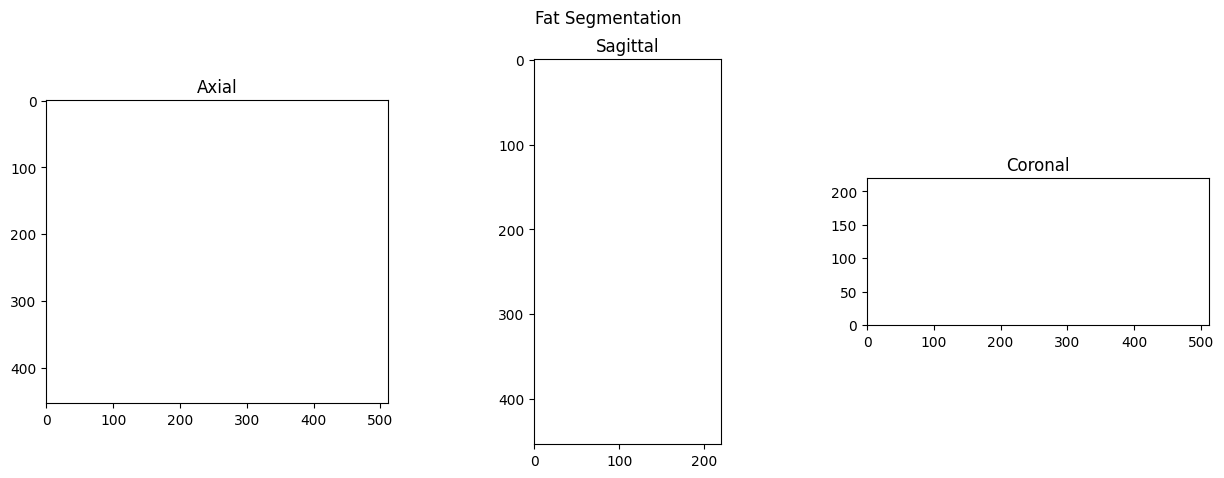

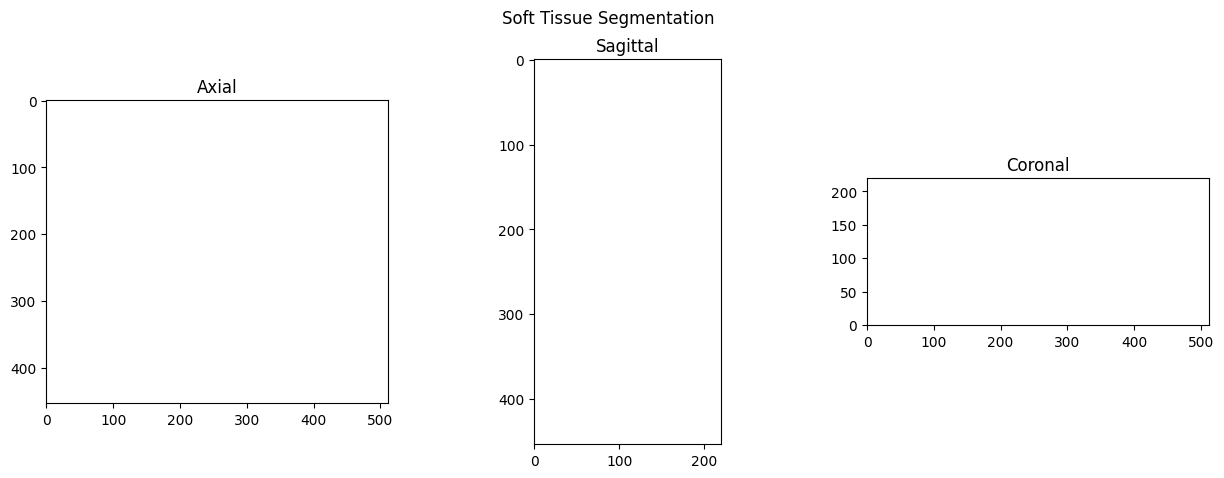

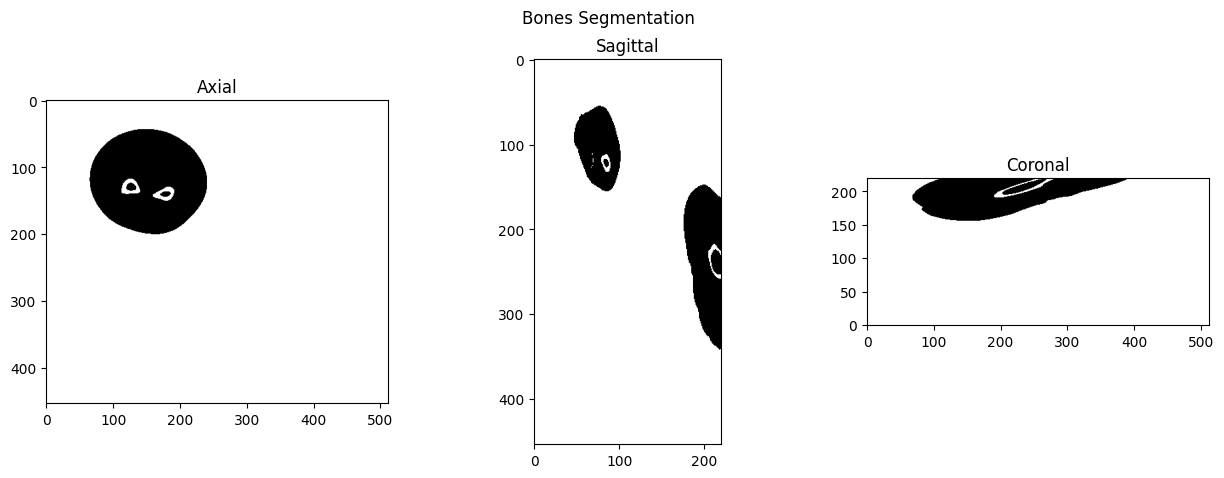

In [25]:
def display_slices_colormap(volume, title):
    axial = volume[:, :, axial_index]
    sagittal = volume[:, sagittal_index, :]
    coronal = volume[coronal_index, :, :]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(axial, cmap='binary')
    axes[0].set_title('Axial')
    axes[1].imshow(sagittal, cmap='binary')
    axes[1].set_title('Sagittal')
    axes[2].imshow(coronal.T, cmap='binary', origin='lower')
    axes[2].set_title('Coronal')
    fig.suptitle(title)
    plt.show()

# Segment fat
fat_lower_threshold, fat_upper_threshold = -200, -50
fat_mask = create_mask(volume, fat_lower_threshold, fat_upper_threshold)
display_slices_colormap(fat_mask, 'Fat Segmentation')

# Segment soft tissue
soft_tissue_lower_threshold, soft_tissue_upper_threshold = -50, 150
soft_tissue_mask = create_mask(volume, soft_tissue_lower_threshold, soft_tissue_upper_threshold)
display_slices_colormap(soft_tissue_mask, 'Soft Tissue Segmentation')

# Segment bones
bones_lower_threshold, bones_upper_threshold = 150, 2000
bones_mask = create_mask(volume, bones_lower_threshold, bones_upper_threshold)
display_slices_colormap(bones_mask, 'Bones Segmentation')

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

No, segmentations are not good for Fat and Soft tissue as dataset does have proper HU Threshold to identify them from data.
Hence, segmentations are not good as expected.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#           \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""
# Collaborated with Hemanth Sai Danaboina
